# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini adalah Heart Disease UCI Dataset, yaitu kumpulan data medis yang dikembangkan untuk membantu analisis terhadap kemungkinan seseorang menderita penyakit jantung berdasarkan sejumlah faktor klinis. Data ini berasal dari penelitian yang dilakukan oleh berbagai institusi ternama, seperti Hungarian Institute of Cardiology di Budapest, University Hospital di Zurich, University Hospital di Basel, serta V.A. Medical Center di Long Beach dan Cleveland Clinic Foundation. Para peneliti yang berkontribusi dalam pengumpulan data ini antara lain Andras Janosi, William Steinbrunn, Matthias Pfisterer, dan Robert Detrano.

Dataset ini pertama kali dirilis melalui UCI Machine Learning Repository dan kemudian diperbarui di platform Kaggle untuk memperbaiki sejumlah kesalahan pada nilai dan deskripsi variabel. Versi yang digunakan dalam proyek ini telah disesuaikan agar konsisten dengan data asli dari UCI dan dapat diakses melalui tautan https://www.kaggle.com/ronitf/heart-disease-uci
.

Secara keseluruhan, dataset ini terdiri dari 303 baris data pasien dengan 13 fitur utama dan 1 label target bernama condition, yang menunjukkan kondisi kesehatan jantung pasien. Data ini sepenuhnya berbentuk structured tabular data, sehingga sangat cocok digunakan dalam eksperimen machine learning yang melibatkan analisis statistik, eksplorasi data, serta pembuatan model klasifikasi.

Atribut-atribut yang terdapat di dalamnya mencakup faktor-faktor penting seperti usia (age), jenis kelamin (sex), tipe nyeri dada (cp), tekanan darah (trestbps), kadar kolesterol (chol), kadar gula darah puasa (fbs), hasil elektrokardiografi (restecg), detak jantung maksimum (thalach), serta kondisi terkait aktivitas fisik seperti angina akibat olahraga (exang), depresi ST (oldpeak), dan kemiringan segmen ST (slope). Selain itu, juga terdapat variabel tentang jumlah pembuluh darah utama yang terlihat melalui fluoroskopi (ca), kondisi thalassemia (thal), dan label target (condition) yang menunjukkan ada atau tidaknya penyakit jantung.

Ukuran dataset yang relatif kecil, sekitar 12 kilobyte, membuatnya efisien untuk digunakan dalam pengembangan sistem machine learning yang menerapkan praktik MLOps, seperti otomatisasi preprocessing, pelatihan model, pelacakan eksperimen dengan MLflow, serta integrasi ke DagsHub untuk penyimpanan artefak dan pelaporan hasil. Struktur datanya yang jelas serta konteks medis yang kuat menjadikannya pilihan ideal untuk proyek yang berfokus pada pemodelan prediktif dan monitoring performa sistem secara menyeluruh.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [26]:
import importlib, subprocess, sys, warnings, os, time, random

def install_if_missing(package):
    try:
        importlib.import_module(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

for pkg in ["numpy", "pandas", "matplotlib", "seaborn", "scikit-learn", "mlflow"]:
    install_if_missing(pkg)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import mlflow
import mlflow.sklearn

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8-whitegrid")
np.random.seed(42)

print(f"Python version   : {sys.version.split()[0]}")
print(f"Pandas version   : {pd.__version__}")
print(f"NumPy version    : {np.__version__}")
print(f"Scikit-learn ver : {GridSearchCV.__module__.split('.')[0]}")
print(f"MLflow version   : {mlflow.__version__}")
print("\n Semua library telah berhasil diimpor dan siap digunakan untuk eksperimen Machine Learning.")

Python version   : 3.12.12
Pandas version   : 2.2.2
NumPy version    : 2.0.2
Scikit-learn ver : sklearn
MLflow version   : 2.19.0

 Semua library telah berhasil diimpor dan siap digunakan untuk eksperimen Machine Learning.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [27]:
import os, time, pandas as pd, numpy as np, mlflow

CSV_FILE = "/content/heart_cleveland_upload.csv"
assert os.path.exists(CSV_FILE), f"❌ File {CSV_FILE} tidak ditemukan!"

start_time = time.time()
df = pd.read_csv(CSV_FILE)
load_time = time.time() - start_time

print("==========================================================")
print("Dataset berhasil dimuat dari file lokal")
print("==========================================================")
print(f"Lokasi File   : {CSV_FILE}")
print(f"Jumlah Baris  : {df.shape[0]:,}")
print(f"Jumlah Kolom  : {df.shape[1]}")
print(f"Waktu Muat    : {load_time:.2f} detik")
print("==========================================================\n")

print("Lima baris pertama:")
display(df.head())

print("\nInformasi dataset:")
df.info()

print("\nStatistik deskriptif:")
display(df.describe().T)

print("\nNilai kosong per kolom:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Tidak ada nilai kosong")

dups = df.duplicated().sum()
print(f"\nJumlah duplikat: {dups}")
if dups > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplikat dihapus. Jumlah baris akhir: {df.shape[0]:,}")

target_col = "target" if "target" in df.columns else "condition"
print(f"\nKolom target : {target_col}")
print("Distribusi target (%):")
display(df[target_col].value_counts(normalize=True).mul(100).round(2))

mlflow.set_tracking_uri("file:///content/mlruns")
mlflow.set_experiment("Heart Disease — Data Loading (Local Upload)")

with mlflow.start_run(run_name="Local_Data_Loading"):
    mlflow.log_param("dataset_source", "local_upload")
    mlflow.log_param("dataset_path", CSV_FILE)
    mlflow.log_param("rows", df.shape[0])
    mlflow.log_param("columns", df.shape[1])
    mlflow.log_param("missing_values", int(missing.sum()))
    mlflow.log_param("duplicates_removed", int(dups))
    mlflow.log_metric("load_time", load_time)
    df[target_col].value_counts().to_csv("target_distribution.csv")
    mlflow.log_artifact("target_distribution.csv")
    mlflow.log_artifact(CSV_FILE)

print("\n==========================================================")
print("Dataset siap digunakan untuk tahapan EDA dan modelling.")
print("==========================================================")

Dataset berhasil dimuat dari file lokal
Lokasi File   : /content/heart_cleveland_upload.csv
Jumlah Baris  : 297
Jumlah Kolom  : 14
Waktu Muat    : 0.01 detik

Lima baris pertama:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB

Statistik deskriptif:


,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2



Nilai kosong per kolom:
Tidak ada nilai kosong

Jumlah duplikat: 0

Kolom target : condition
Distribusi target (%):


,proportion
condition,
0,53.87
1,46.13



Dataset siap digunakan untuk tahapan EDA dan modelling.


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Exploratory Data Analysis (EDA) — Memahami Karakteristik Data

Dimensi Data:
Baris : 297
Kolom : 14

Tipe Data per Kolom:


,Tipe Data
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


<Figure size 1800x1200 with 0 Axes>

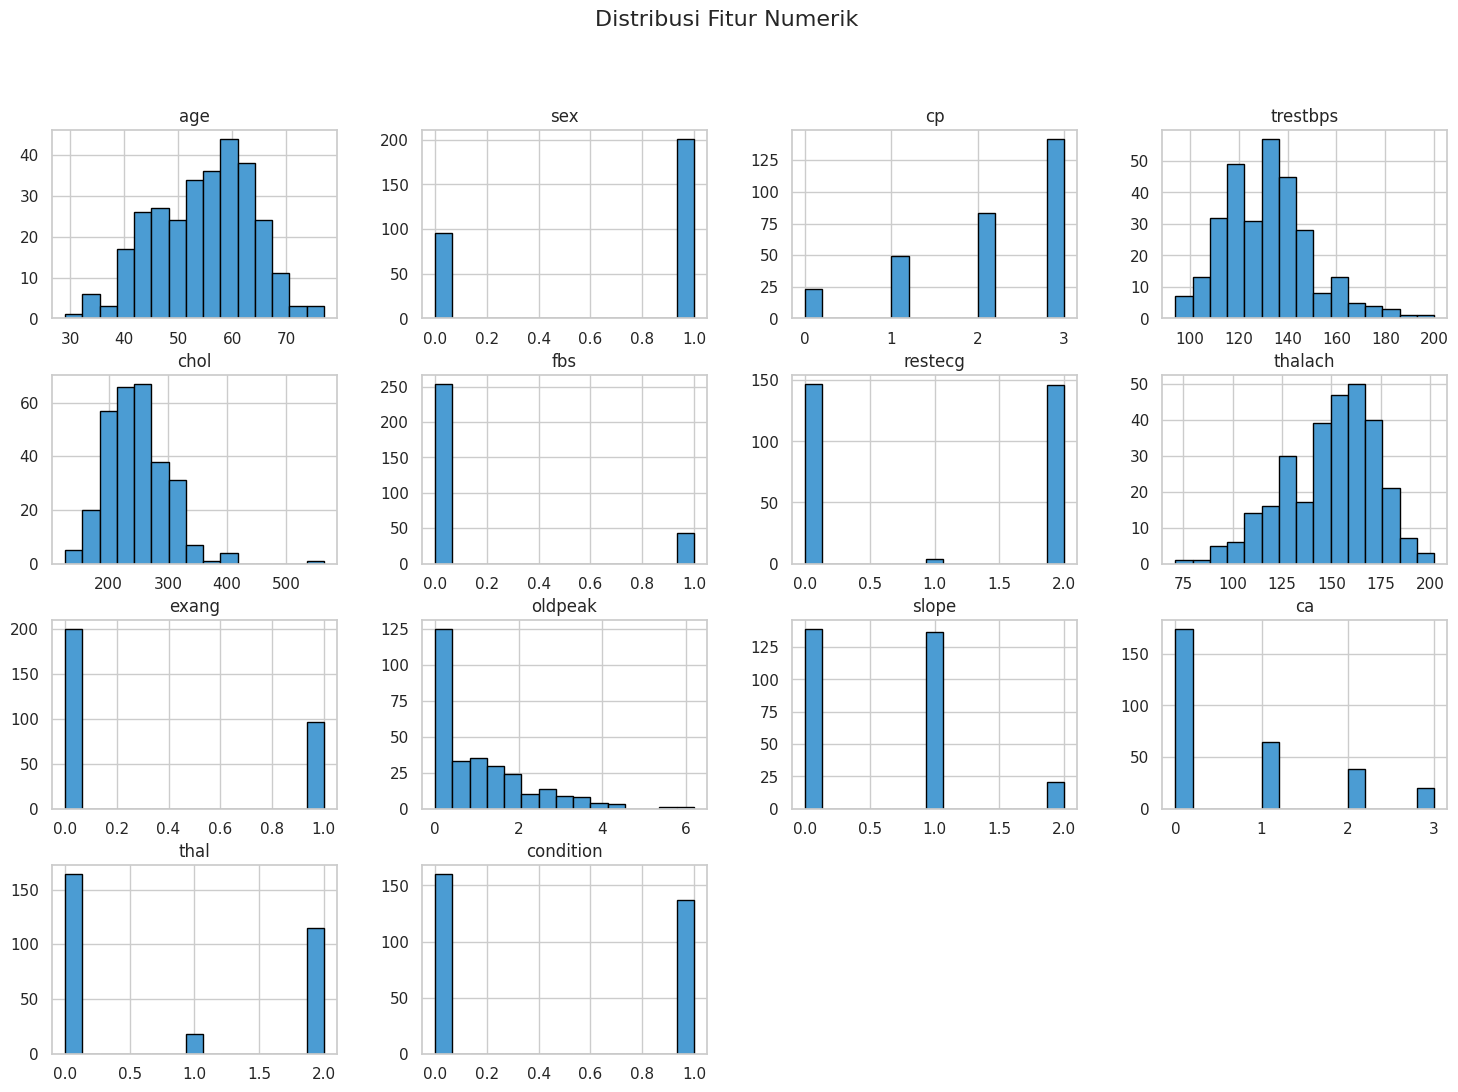

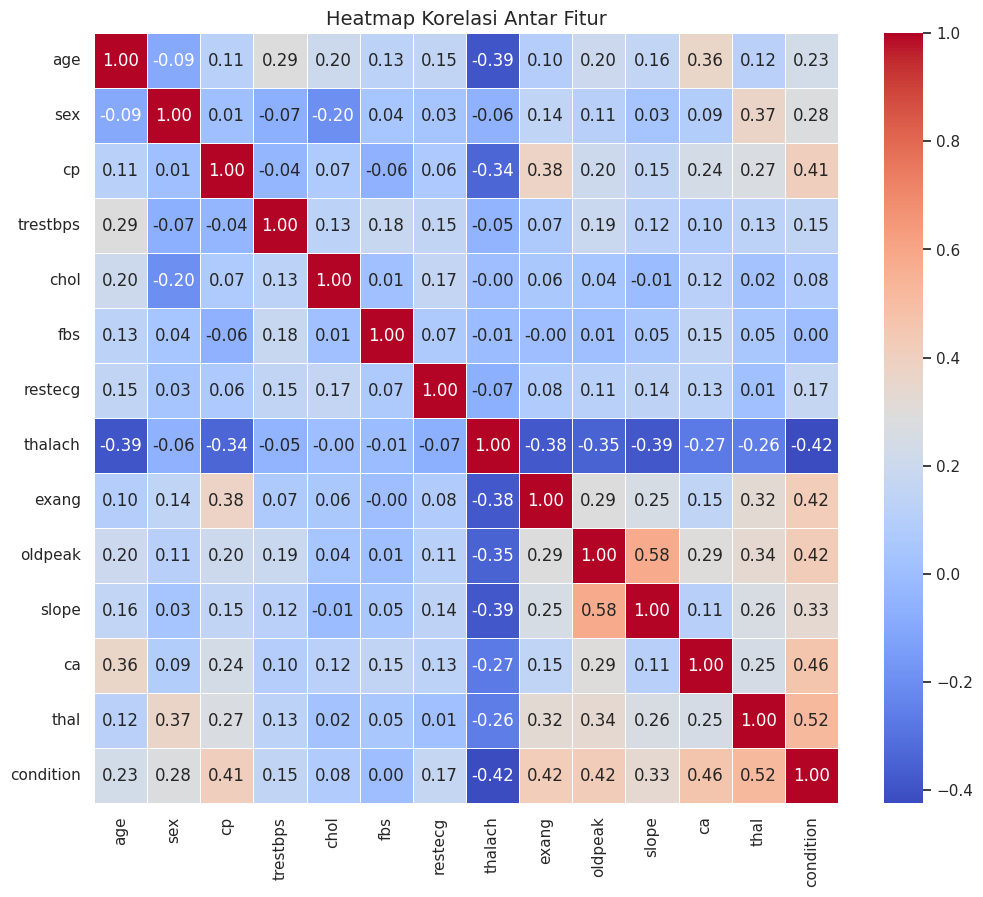

Korelasi terhadap target (descending):


,Korelasi
thal,0.520516
ca,0.463189
oldpeak,0.424052
exang,0.421355
cp,0.408945
slope,0.333049
sex,0.278467
age,0.227075
restecg,0.166343
trestbps,0.153490


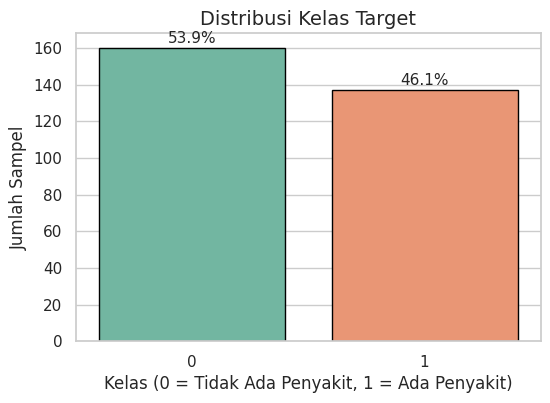

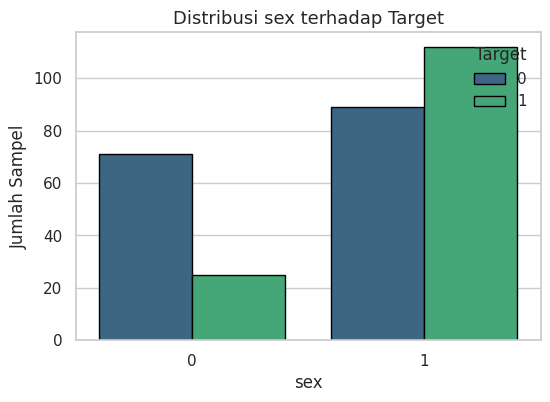

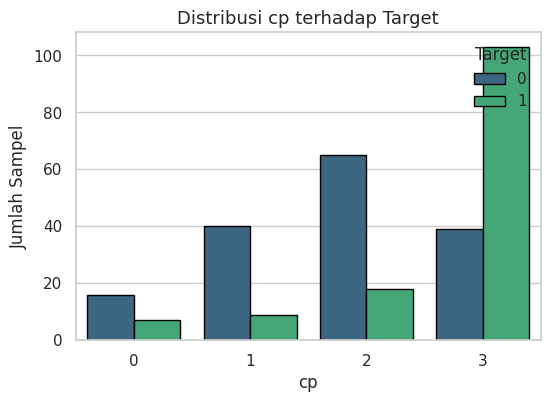

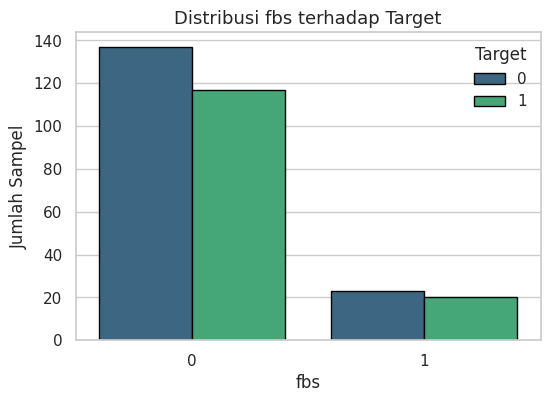

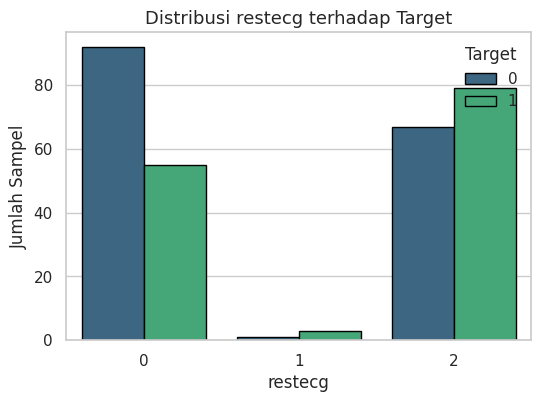

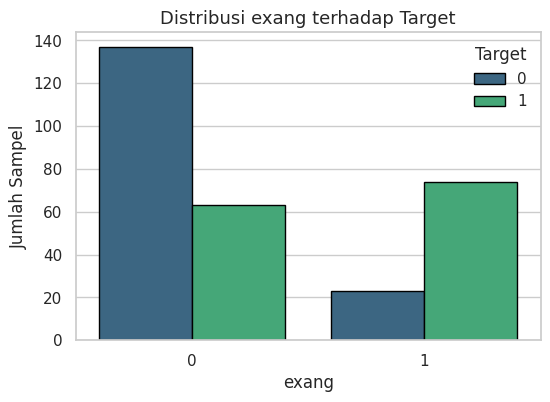

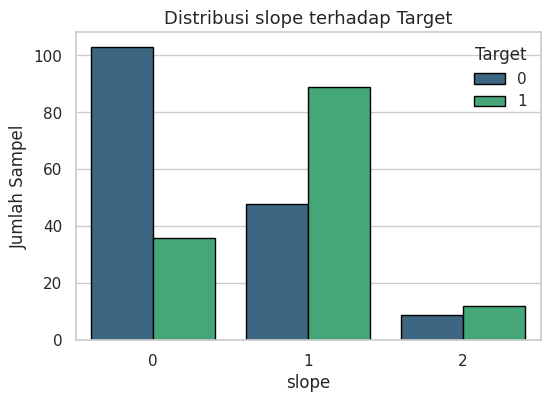

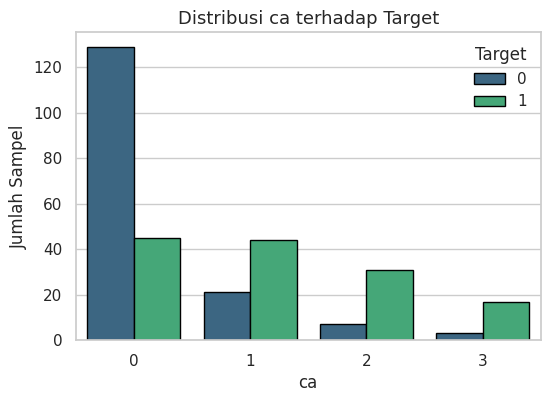

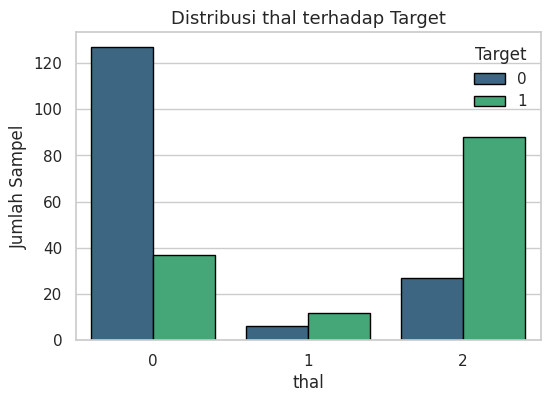

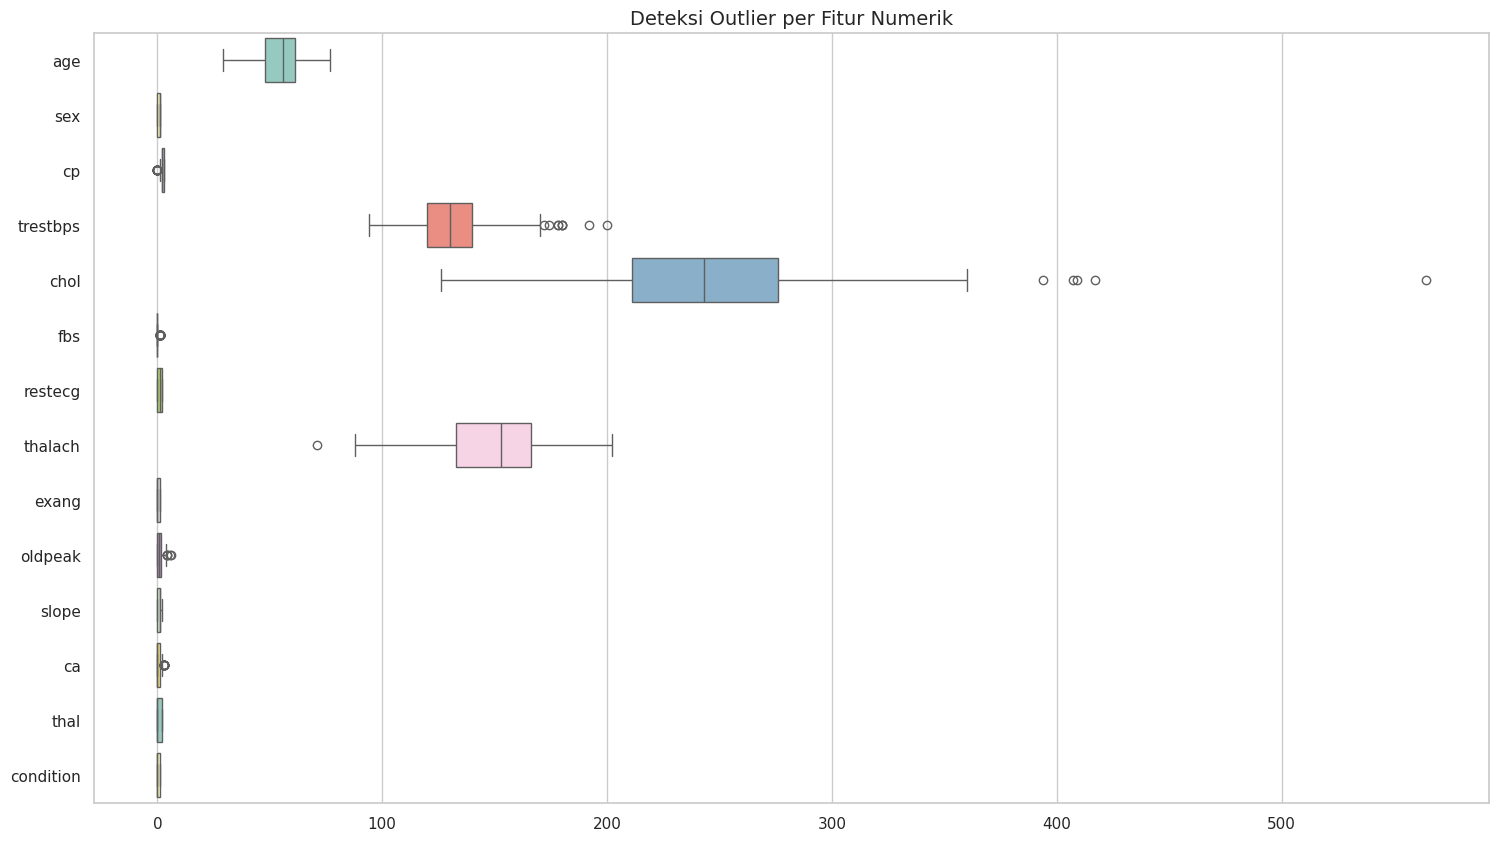

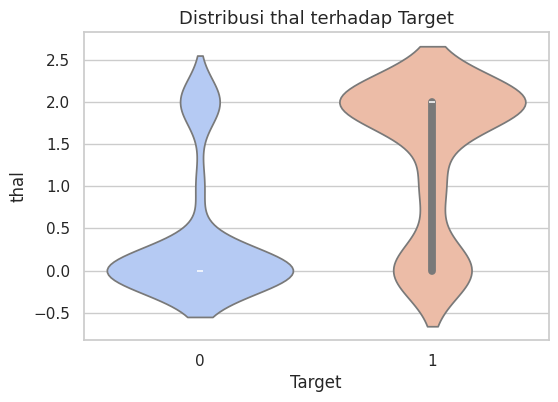

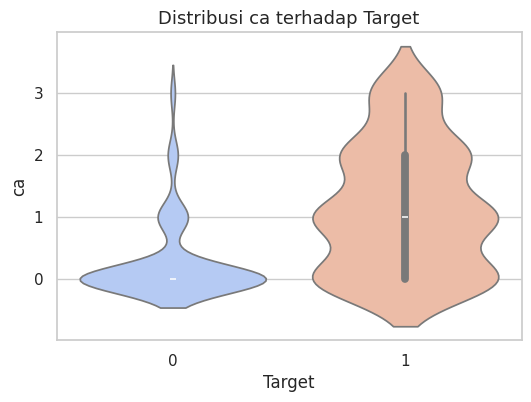

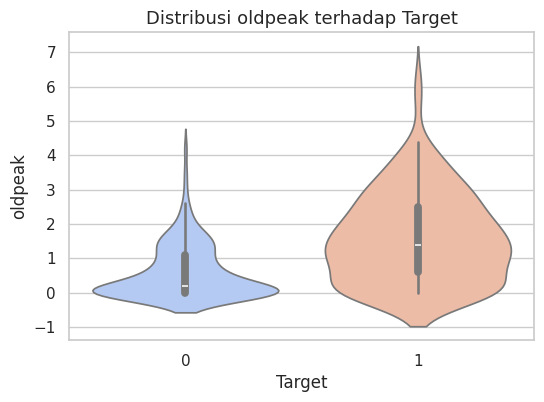


Ringkasan EDA:
total_rows               : 297
total_columns            : 14
numeric_features         : 14
categorical_features     : 8
strongest_correlations   : {'thal': 0.5205164641924139, 'ca': 0.4631886250630223, 'oldpeak': 0.4240520567159986, 'exang': 0.4213554904564531, 'cp': 0.40894468667523926}
load_time_sec            : 7.86

Exploratory Data Analysis (EDA) selesai dan siap untuk tahap preprocessing.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import time

sns.set(style="whitegrid")
start_time = time.time()

assert 'df' in locals(), "Dataset belum dimuat. Jalankan tahap 'Memuat Dataset' terlebih dahulu."

print("==========================================================")
print("Exploratory Data Analysis (EDA) — Memahami Karakteristik Data")
print("==========================================================\n")

print("Dimensi Data:")
print(f"Baris : {df.shape[0]:,}")
print(f"Kolom : {df.shape[1]:,}\n")

print("Tipe Data per Kolom:")
display(df.dtypes.to_frame("Tipe Data"))

num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 12))
df[num_cols].hist(bins=15, figsize=(18, 12), layout=(4, 4), color='#4B9CD3', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()

plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur", fontsize=14)
plt.show()

target_col = "target" if "target" in df.columns else "condition"
corr_target = corr[target_col].drop(target_col).sort_values(ascending=False)
print("Korelasi terhadap target (descending):")
display(corr_target.to_frame("Korelasi"))

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=target_col, data=df, palette="Set2", edgecolor="black")
plt.title("Distribusi Kelas Target", fontsize=14)
plt.xlabel("Kelas (0 = Tidak Ada Penyakit, 1 = Ada Penyakit)")
plt.ylabel("Jumlah Sampel")

for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(df)*100:.1f}%', (p.get_x() + p.get_width()/2, p.get_height() + 3),
                 ha='center', fontsize=11)
plt.show()

cat_cols = [col for col in df.columns if df[col].nunique() <= 10 and col != target_col]
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target_col, data=df, palette="viridis", edgecolor="black")
    plt.title(f"Distribusi {col} terhadap Target", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Jumlah Sampel")
    plt.legend(title="Target", loc="upper right")
    plt.show()

plt.figure(figsize=(18, 10))
sns.boxplot(data=df[num_cols], orient="h", palette="Set3")
plt.title("Deteksi Outlier per Fitur Numerik", fontsize=14)
plt.show()

key_features = corr_target.head(3).index.tolist()

for feat in key_features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=target_col, y=feat, data=df, palette="coolwarm")
    plt.title(f"Distribusi {feat} terhadap Target", fontsize=13)
    plt.xlabel("Target")
    plt.ylabel(feat)
    plt.show()

eda_summary = {
    "total_rows": df.shape[0],
    "total_columns": df.shape[1],
    "numeric_features": len(num_cols),
    "categorical_features": len(cat_cols),
    "strongest_correlations": corr_target.head(5).to_dict(),
    "load_time_sec": round(time.time() - start_time, 2)
}

print("\nRingkasan EDA:")
for k, v in eda_summary.items():
    print(f"{k:25}: {v}")

mlflow.set_tracking_uri("file:///content/mlruns")
mlflow.set_experiment("Heart Disease — EDA")

with mlflow.start_run(run_name="EDA_HeartDisease"):
    mlflow.log_param("num_features", len(num_cols))
    mlflow.log_param("cat_features", len(cat_cols))
    mlflow.log_metric("eda_duration_sec", eda_summary["load_time_sec"])
    mlflow.log_dict(eda_summary, "eda_summary.json")

print("\n==========================================================")
print("Exploratory Data Analysis (EDA) selesai dan siap untuk tahap preprocessing.")
print("==========================================================")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [29]:
import pandas as pd
import numpy as np
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report
import os, time, json

start_time = time.time()

assert 'df' in locals(), "Dataset belum dimuat — jalankan tahap Memuat Dataset terlebih dahulu."
target_col = "target" if "target" in df.columns else "condition"

print("==========================================================")
print("Data Preprocessing — Memastikan Kualitas Dataset")
print("==========================================================")

initial_shape = df.shape
missing_before = df.isnull().sum().sum()
dupes_before = df.duplicated().sum()

df = df.drop_duplicates()
df = df.dropna()

missing_after = df.isnull().sum().sum()
dupes_after = df.duplicated().sum()

print(f"Jumlah nilai kosong sebelum: {missing_before}, sesudah: {missing_after}")
print(f"Jumlah duplikat sebelum   : {dupes_before}, sesudah: {dupes_after}")
print(f"Dimensi dataset akhir     : {df.shape[0]} baris × {df.shape[1]} kolom")

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
outlier_flags = lof.fit_predict(df.select_dtypes(include=np.number))
outliers = np.sum(outlier_flags == -1)

print(f"Jumlah outlier terdeteksi : {outliers}")
df_clean = df[outlier_flags != -1].reset_index(drop=True)
print(f"Dataset setelah pembersihan: {df_clean.shape[0]} baris")

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print(f"Fitur numerik     : {len(num_cols)} kolom")
print(f"Fitur kategorikal : {len(cat_cols)} kolom")

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Data train : {X_train.shape}")
print(f"Data val   : {X_val.shape}")
print(f"Data test  : {X_test.shape}")

X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)

print(f"\nDimensi akhir fitur terproses: {X_train_prep.shape[1]} kolom setelah encoding & scaling.")

os.makedirs("preprocessing_output", exist_ok=True)
np.savez_compressed(
    "preprocessing_output/heart_preprocessed.npz",
    X_train=X_train_prep, y_train=y_train,
    X_val=X_val_prep, y_val=y_val,
    X_test=X_test_prep, y_test=y_test
)

with open("preprocessing_output/feature_summary.json", "w") as f:
    json.dump({
        "num_features": num_cols,
        "cat_features": cat_cols,
        "encoded_dim": X_train_prep.shape[1],
        "rows_after_cleaning": df_clean.shape[0]
    }, f, indent=2)

print("\nPreprocessed dataset disimpan di folder 'preprocessing_output/'")

mlflow.set_tracking_uri("file:///content/mlruns")
mlflow.set_experiment("Heart Disease — Data Preprocessing")

with mlflow.start_run(run_name="Data_Preprocessing"):
    mlflow.log_param("initial_shape", initial_shape)
    mlflow.log_param("rows_after_cleaning", df_clean.shape[0])
    mlflow.log_param("num_features", len(num_cols))
    mlflow.log_param("cat_features", len(cat_cols))
    mlflow.log_metric("outliers_removed", int(outliers))
    mlflow.log_artifact("preprocessing_output/feature_summary.json")
    mlflow.log_artifact("preprocessing_output/heart_preprocessed.npz")

total_time = round(time.time() - start_time, 2)
print("\n==========================================================")
print("Data Preprocessing selesai — dataset siap untuk pelatihan model.")
print(f"Durasi proses : {total_time:.2f} detik")
print("==========================================================")

Data Preprocessing — Memastikan Kualitas Dataset
Jumlah nilai kosong sebelum: 0, sesudah: 0
Jumlah duplikat sebelum   : 0, sesudah: 0
Dimensi dataset akhir     : 297 baris × 14 kolom
Jumlah outlier terdeteksi : 6
Dataset setelah pembersihan: 291 baris
Fitur numerik     : 13 kolom
Fitur kategorikal : 0 kolom
Data train : (174, 13)
Data val   : (58, 13)
Data test  : (59, 13)

Dimensi akhir fitur terproses: 13 kolom setelah encoding & scaling.

Preprocessed dataset disimpan di folder 'preprocessing_output/'

Data Preprocessing selesai — dataset siap untuk pelatihan model.
Durasi proses : 0.11 detik
